## **Importing Required Libraries**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  # for classification
from sklearn.neighbors import KNeighborsRegressor  # for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor


## **Reading Data from CSV**

In [ ]:
data = pd.read_csv('/content/treadmillData1.csv')

## **Cleaning Data**

**1 . Handling Missing**

Remove rows with missing values

In [ ]:
data = data.dropna()

Fill missing values with the mean of each column

In [ ]:
data = data.fillna(data.mean())

Interpolate missing values : used for filling missing values based on the values of adjacent rows.

In [ ]:
data = data.interpolate()

Custom Filling : Fill missing values with a custom value, e.g., 0



In [ ]:
data = data.fillna(0)

Forward or Backward Fill :  propagate the last known value forward or the next known value backward to fill missing values.

In [ ]:
# Forward fill (propagate last known value forward)
data = data.ffill()

# Backward fill (propagate next known value backward)
data = data.bfill()


Removing Columns with Missing Values:remove columns with a high percentage of missing values if they are not critical to your analysis.

In [ ]:
# Remove columns with missing values (threshold set to 30%)
data = data.dropna(axis=1, thresh=0.7*len(data))


Remove duplicate rows

In [ ]:
data = data.drop_duplicates()


## **Renaming columns**

In [ ]:
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

## **The k-Nearest Neighbors (k-NN) algorithm**

We are using **'Age','Weight','Height','Humidity', 'respiratory_rate' and 'Speed**' for predicting **'heart_rate'**

In [ ]:
names = ['Age','Weight','Height','Humidity','respiratory_rate','Speed']
features = data[names]
target = data['heart_rate']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## **Method 1 : KNN Classification**

In [ ]:
k = 5  # The number of neighbors to consider (you can choose any suitable value)
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)
print("prediction using KNN classification : ", y_pred)

prediction using KNN classification :  [182. 118. 157. 192. 189. 143. 127. 154.  98. 192. 117.  98. 134. 194.
  96. 112.  92. 127. 151. 185. 185.  99. 128. 156. 130.  94. 141. 128.
 194.  98.  96.  94.  85. 102. 151. 124. 144. 100. 124. 192.  94. 100.
 106. 127. 132. 194. 142.  99. 153. 112. 186. 194. 130. 142. 140. 113.
 136. 123. 104. 100. 142. 136. 122. 129. 146. 130.  98. 189. 121. 129.
 173. 164. 117. 163. 117. 146. 100. 115. 126. 194. 143. 129. 157. 132.
 115. 117. 157. 135.  98.  94. 131. 157. 112. 173. 145. 116. 145.  99.
 112. 101. 121. 125. 189. 152. 104.  85. 143. 138. 157. 157. 157. 128.
 115. 125. 140. 125. 157. 117. 189. 157. 130. 187. 100. 161. 194. 130.
 112. 100. 189. 157. 122. 122. 192. 167. 187. 144. 101. 130. 127. 157.
 130. 120.  97. 151. 189.  96. 128. 118.  97. 126. 130. 189. 112. 124.
  96. 133. 187.  96. 189. 103. 189. 189. 122. 118.  96. 114. 130.  97.
 102. 126. 167. 159. 121. 154. 151. 129. 173. 134. 103. 126. 130.  96.
 114. 171. 157. 163. 194. 153. 115.  9

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy off KNN classification : ", accuracy)

Accuracy off KNN classification :  0.036458333333333336


## **Method 2 : KNN Regression**

In [ ]:
k = 5  # The number of neighbors to consider (you can choose any suitable value)
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test)
print("prediction using KNN Regression : ", y_pred)

prediction using KNN Regression :  [185.2 143.8 157.2 191.4 189.8 149.  143.4 156.6 106.6 191.2 133.2 105.
 143.8 192.  122.  136.8 103.6 152.4 164.6 190.  189.4 120.  165.  165.2
 149.2 102.8 149.8 143.2 193.6 105.6 131.4 100.6 121.2 124.8 168.2 155.
 159.8  99.2 136.6 192.8 115.8 104.6 128.8 140.2 136.  194.2 154.8 114.6
 161.2 140.  189.  192.4 140.8 154.4 156.2 147.6 131.4 144.8 134.2 101.
 150.4 146.  168.2 141.  153.2 150.6 106.6 189.  131.2 137.2 166.4 137.4
 127.4 152.6 137.4 157.2 107.6 133.6 137.  193.4 158.  145.2 155.2 137.4
 127.2 131.8 154.8 151.4 112.8 125.2 159.  167.4 147.  165.6 156.  124.6
 161.2 109.4 118.4 107.2 129.  137.4 188.6 161.6 138.2 122.  148.2 154.8
 152.4 164.4 158.8 149.6 123.4 150.6 157.6 146.  152.8 133.8 188.4 156.6
 132.2 183.6 107.  176.6 195.  152.2 151.8 110.8 186.8 155.4 129.6 135.8
 188.8 151.  188.4 150.   99.4 151.4 164.6 153.4 153.4 125.2 100.8 159.6
 189.4 123.6 149.4 130.  123.8 143.4 149.2 188.8 140.  151.8 120.2 154.6
 187.8 122.  189.4 

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error KNN Regression :", mse)

Mean Squared Error KNN Regression : 136.0122916666667


### **Appling Decision Tree Algorithm**

In [ ]:
target_variable = 'heart_rate'
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Ensure all categorical columns are strings
X[categorical_columns] = X[categorical_columns].astype(str)

# Create transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_columns)
    ])

# Apply transformers to the features
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 27.4375
R-squared: 0.9650510351373139


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### **Appling Random Forest Algorithm**

In [ ]:

# Step 1: Feature Selection
selected_features =['Age','Weight','Height','Humidity','respiratory_rate','Speed']
X = data[selected_features]
y = data['heart_rate']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['Age','Weight','Height','Humidity','respiratory_rate','Speed'], drop_first=True)

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 25.82916770833333


### Draw Histogram of **Heart Rate** by **Speed**

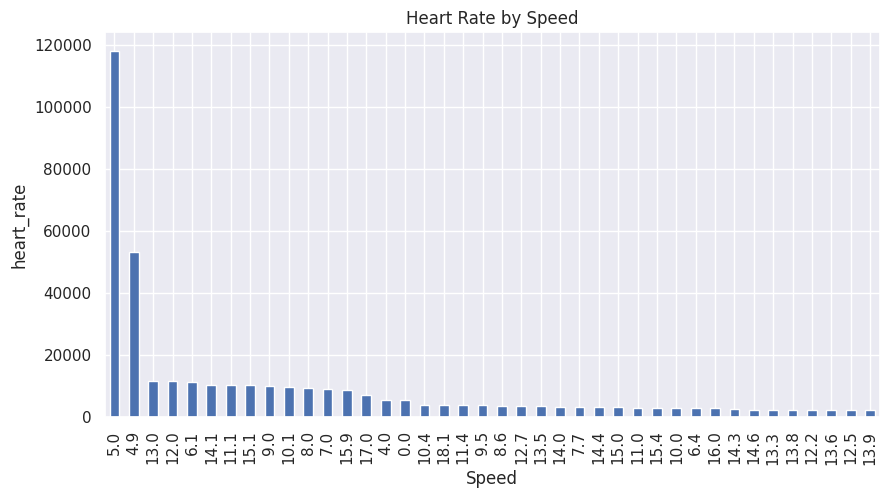

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


data = pd.read_csv('/content/treadmillData1.csv')
data = data.fillna(0)
data = data.dropna()
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

data.Speed.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Heart Rate by Speed")
plt.ylabel('heart_rate')
plt.xlabel('Speed');


### **Draw Heat Map of the Dataset**

<ipython-input-27-df278352ef5d>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= data.corr()


,Age,time(seconds),Speed,heart_rate,VO2(mL/min),VCO2( mL/min),respiratory_rate,VE(L/min),ID,Weight,Humidity,Temperature (°C),Height,Sex (Female - 1)
Age,1.000000,-0.014284,0.011047,0.009049,-0.003754,-0.005430,0.006655,-0.012286,-0.067652,0.940700,0.911498,0.916598,0.943070,0.329267
time(seconds),-0.014284,1.000000,0.350081,0.552327,0.499563,0.638231,0.527979,0.676877,0.065151,-0.016075,-0.017050,-0.017460,-0.017218,-0.005678
Speed,0.011047,0.350081,1.000000,0.686819,0.774683,0.696029,0.623414,0.694171,-0.059752,0.006601,0.005380,0.005295,0.005818,-0.000210
heart_rate,0.009049,0.552327,0.686819,1.000000,0.741530,0.763382,0.683201,0.765965,-0.065757,0.001985,0.000521,0.000224,0.000921,-0.003276
VO2(mL/min),-0.003754,0.499563,0.774683,0.741530,1.000000,0.937235,0.612838,0.866960,-0.021078,-0.009342,-0.010299,-0.010619,-0.010378,-0.006421
VCO2( mL/min),-0.005430,0.638231,0.696029,0.763382,0.937235,1.000000,0.663391,0.937898,0.048831,-0.011020,-0.012113,-0.012428,-0.012141,-0.006773
respiratory_rate,0.006655,0.527979,0.623414,0.683201,0.612838,0.663391,1.000000,0.770270,-0.052211,0.003854,0.002843,0.002803,0.003218,-0.000206
VE(L/min),-0.012286,0.676877,0.694171,0.765965,0.866960,0.937898,0.770270,1.000000,0.011812,-0.017148,-0.018001,-0.018319,-0.018224,-0.008703
ID,-0.067652,0.065151,-0.059752,-0.065757,-0.021078,0.048831,-0.052211,0.011812,1.000000,-0.070703,-0.069465,-0.070033,-0.071571,-0.027756
Weight,0.940700,-0.016075,0.006601,0.001985,-0.009342,-0.011020,0.003854,-0.017148,-0.070703,1.000000,0.955701,0.961479,0.990840,0.326429


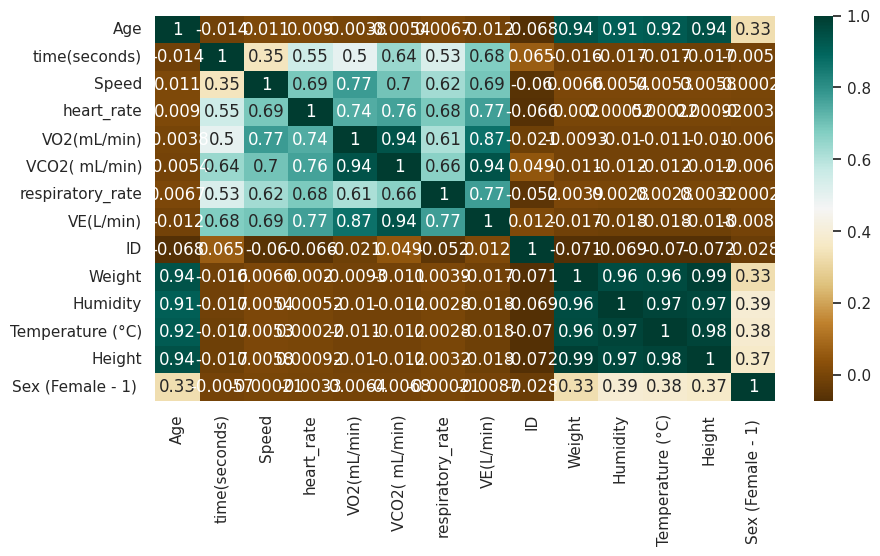

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


data = pd.read_csv('/content/treadmillData1.csv')
data = data.fillna(0)
data = data.dropna()
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


### Draw Scatterplot of **Heart Rate** by **Speed**

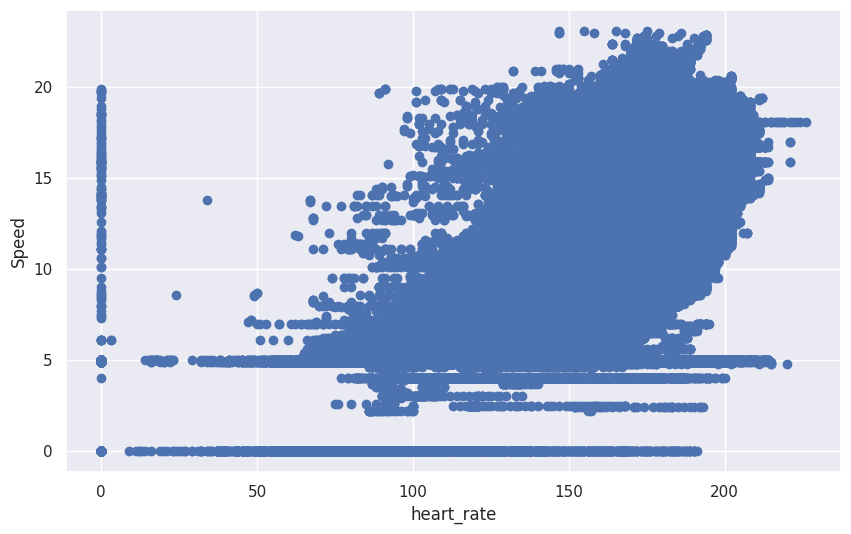

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


data = pd.read_csv('/content/treadmillData1.csv')
data = data.fillna(0)
data = data.dropna()
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['heart_rate'], data['Speed'])
ax.set_xlabel('heart_rate')
ax.set_ylabel('Speed')
plt.show()


### **Boxplot of Features**

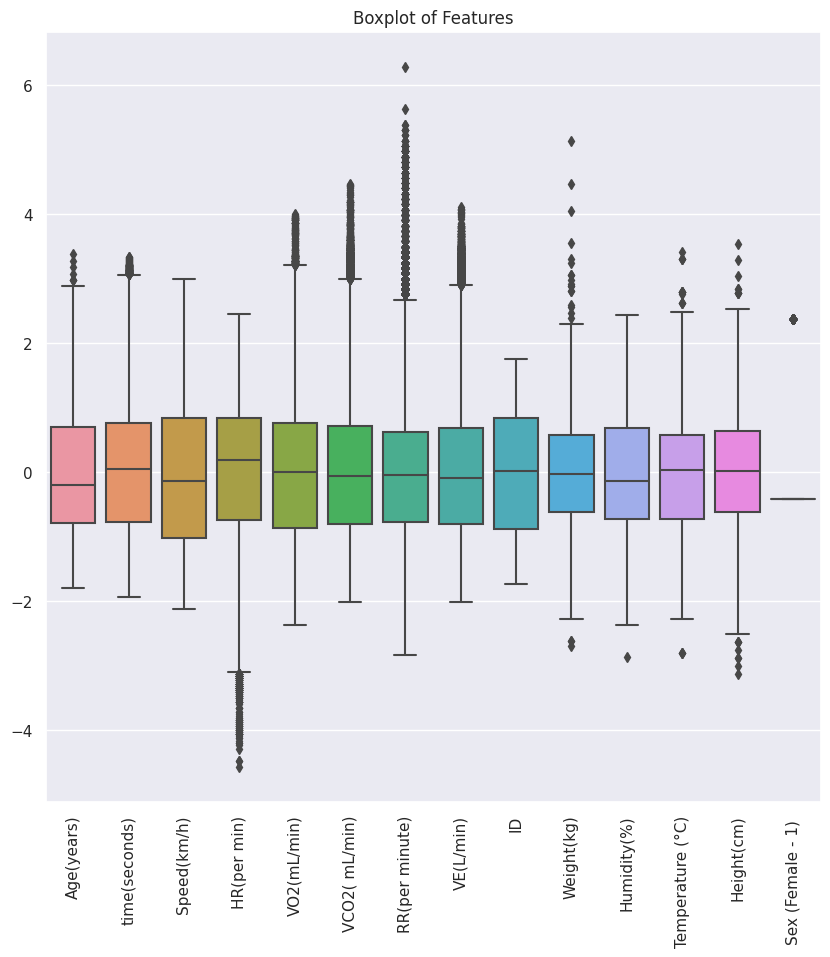

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/treadmillData1.csv')

# Boxplot on numeric columns to find outliers
columns = list(data.select_dtypes(include=['int64','float64']).columns)
num_data = data[columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
scaled_df = pd.DataFrame(scaled_data, columns=columns)

plt.figure(figsize=(10, 10))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

### **Correlation Matrix Heatmap**

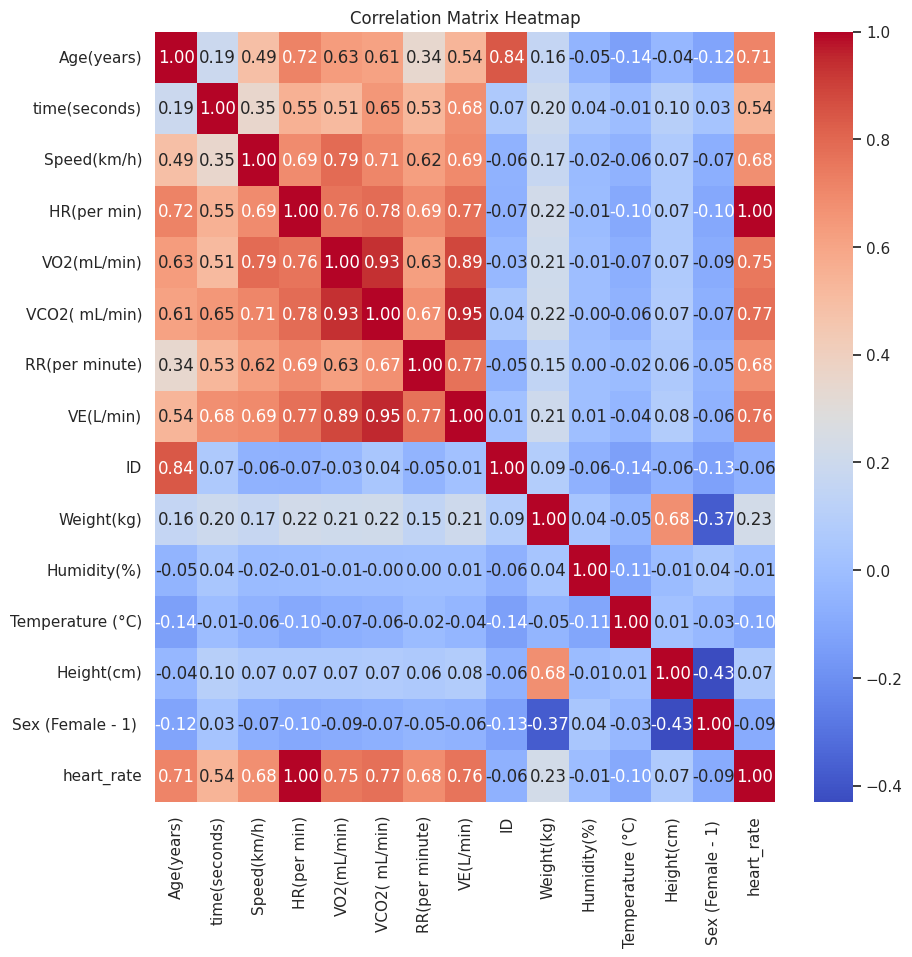

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/treadmillData1.csv')
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

# plotting correlation matrix to find correlation between features
label_encoder = LabelEncoder()

cor_df = pd.concat([scaled_df, data['heart_rate']], axis=1)
cor_df['heart_rate'] = label_encoder.fit_transform(cor_df['heart_rate'])

correlation_matrix = cor_df.corr()


plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()

### **Elbow Curve**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

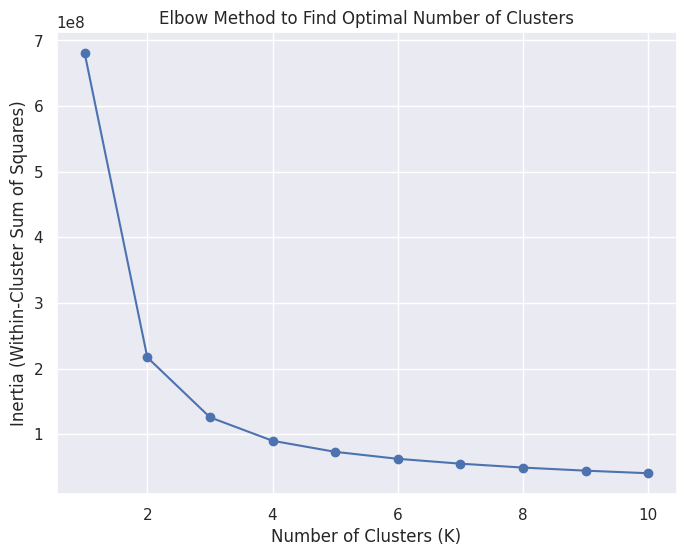

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usinf elbow method to find optimal k(number of clusters) for kmeans
from sklearn.cluster import KMeans

data = pd.read_csv('/content/treadmillData1.csv')
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    'Sex (Female - 1)': 'gender',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)

data_cleaned = data[['heart_rate', 'respiratory_rate']].dropna()


inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

### **K-means Clustering of heart_rate vs respiratory_rate**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


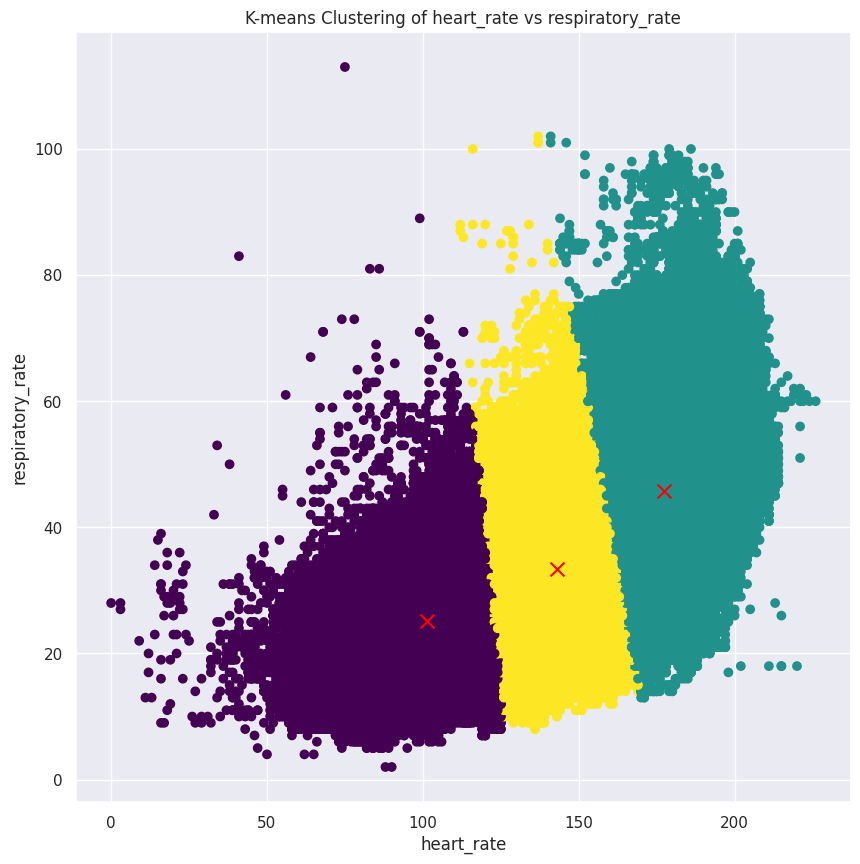

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usinf elbow method to find optimal k(number of clusters) for kmeans
from sklearn.cluster import KMeans

data = pd.read_csv('/content/treadmillData1.csv')
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    'Sex (Female - 1)': 'gender',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)
data_cleaned = data[['heart_rate', 'respiratory_rate']].dropna()

# Applying Kmeans and plotting the cluster centers and clusters
plt.figure(figsize=(10, 10))

kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned[['heart_rate', 'respiratory_rate']])

plt.scatter(data_cleaned['heart_rate'], data_cleaned['respiratory_rate'], c=data_cleaned['Cluster'], cmap='viridis', marker='o', label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')

plt.xlabel('heart_rate')
plt.ylabel('respiratory_rate')
plt.title('K-means Clustering of heart_rate vs respiratory_rate')
plt.show()


### **ROC Curve**

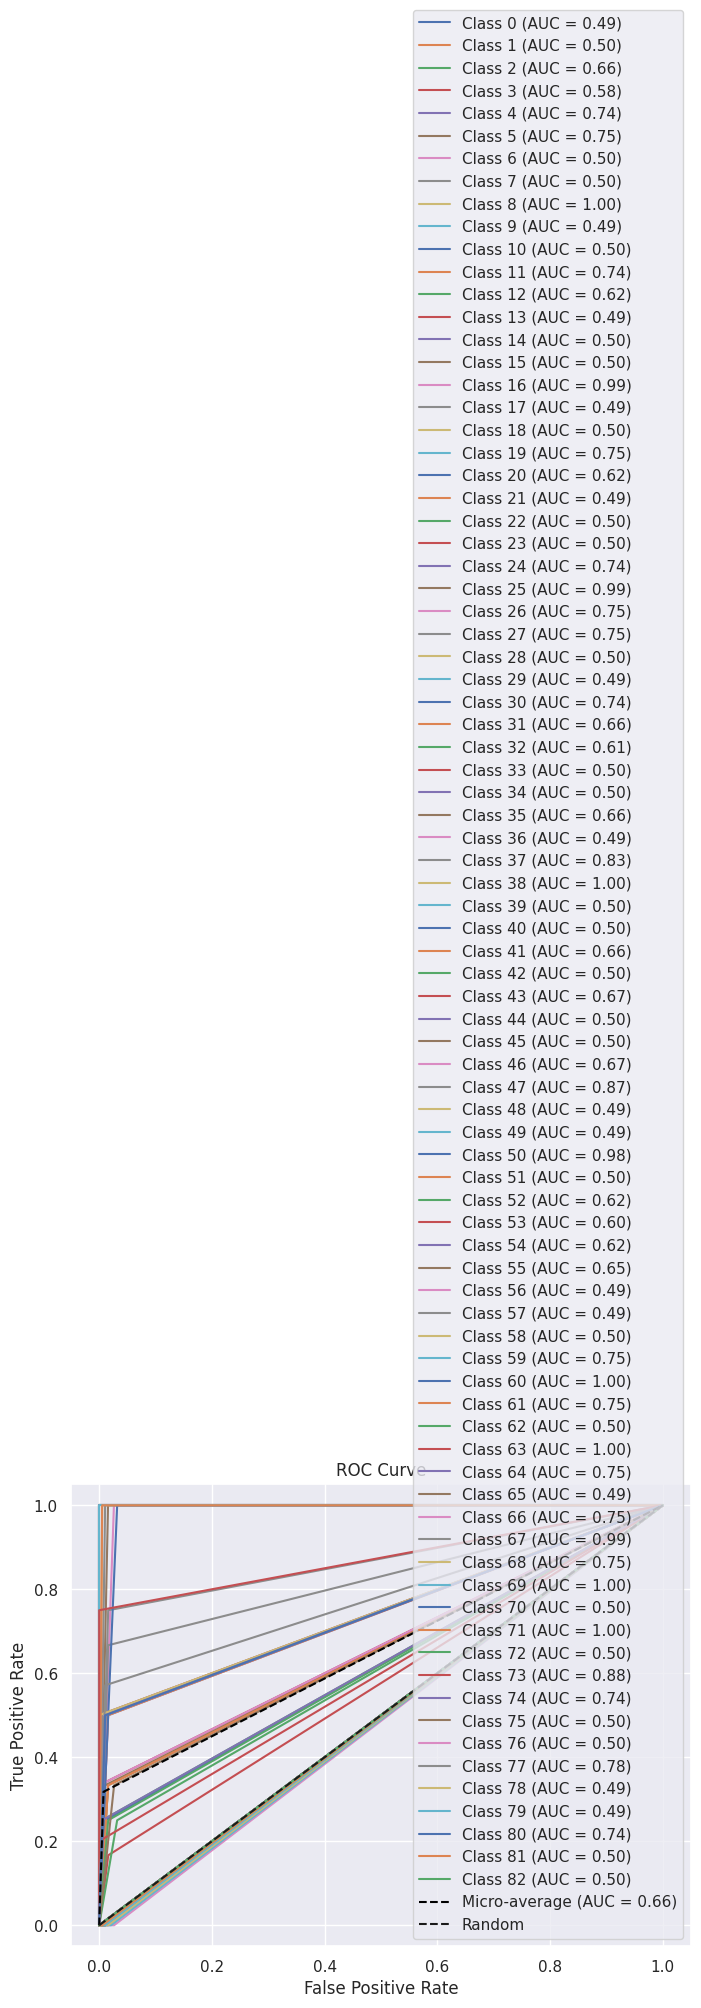

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('/content/treadmillData1.csv')
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    'Sex (Female - 1)': 'gender',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)
data = data.dropna()

names = ['Age','Weight','Height','Humidity','respiratory_rate','Speed']
features = data[names]
target = data['heart_rate']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

# Convert true labels to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))

# Convert predicted class labels to one-hot encoded format
y_pred_onehot = label_binarize(y_pred, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_onehot.ravel(), y_pred_onehot.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})', linestyle='--', color='black')

# Plot the random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Ploting Distinct Ages with Average Heart rate on each age category**

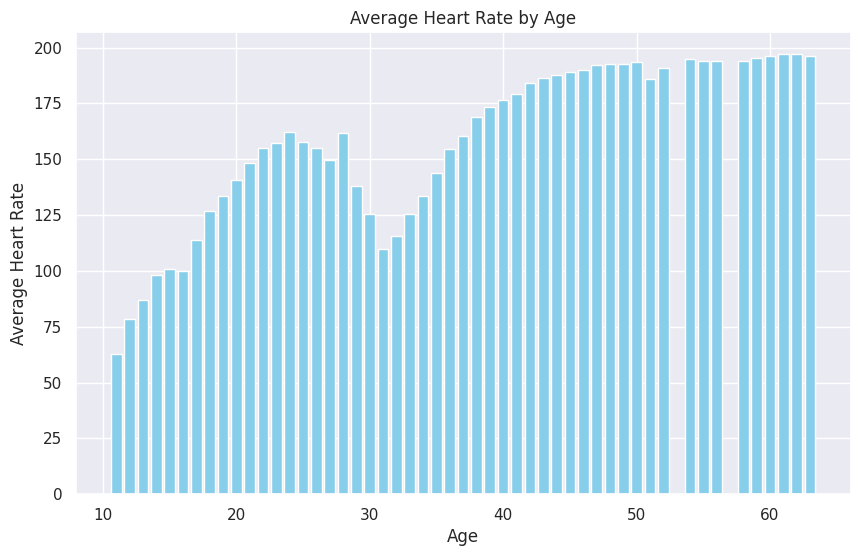

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/treadmillData1.csv')
# Define the column mapping
column_mapping = {
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'heart_rate',
    'RR(per minute)': 'respiratory_rate',
    'Sex (Female - 1)': 'gender',
    # Add more mappings as needed
}

# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)
data = data.dropna()

grouped_data = data.groupby('Age')['heart_rate'].mean().reset_index()
# Extract age and average heart rate from grouped data
ages = grouped_data['Age']
average_heart_rate = grouped_data['heart_rate']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ages, average_heart_rate, color='skyblue')
plt.title('Average Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Heart Rate')
plt.show()

### **Confusion Matrix**

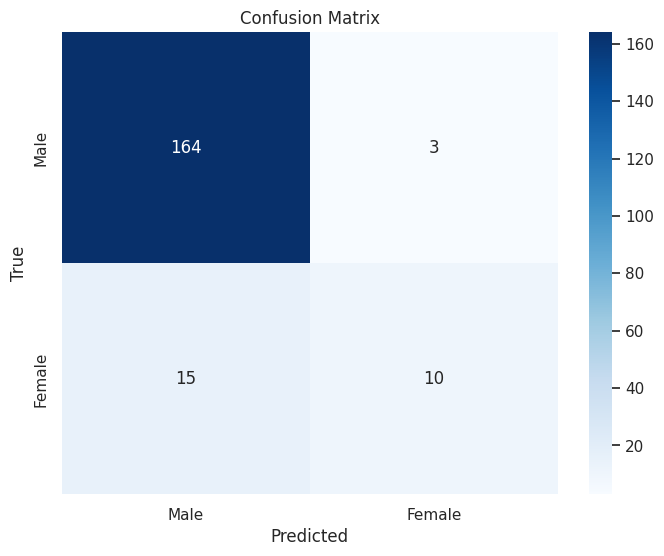

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       167
         1.0       0.77      0.40      0.53        25

    accuracy                           0.91       192
   macro avg       0.84      0.69      0.74       192
weighted avg       0.90      0.91      0.89       192



9

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/treadmillData1.csv')
# Replace the column names accordingly
df.rename(columns={
    'Age(years)': 'Age',
    'Weight(kg)': 'Weight',
    'Height(cm)': 'Height',
    'Humidity(%)': 'Humidity',
    'Speed(km/h)': 'Speed',
    'HR(per min)': 'HeartRate',
    'RR(per minute)': 'RespiratoryRate',
    'Sex (Female - 1) ': 'Gender'
}, inplace=True)
# Rename the columns based on the mapping
data.rename(columns=column_mapping, inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)

# Define features (X) and target variable (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for additional metrics
print(classification_report(y_test, y_pred))
9